<a href="https://colab.research.google.com/github/tamer017/football-players-ratings-and-salaries/blob/main/football_players'_ratings_and_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/CompleteDataset.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# no need for player name or photo or any information about the country
# also no need for the position data we will use the prefared position
data.drop(['Unnamed: 0' , 'Name','Photo', 'Flag',
       'Club Logo', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',"Potential",
       'RS', 'RW', 'RWB', 'ST'],axis=1,inplace=True)
data.head()


,Age,Nationality,Overall,Club,Value,Wage,Special,Acceleration,Aggression,Agility,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,32,Portugal,94,Real Madrid CF,€95.5M,€565K,2228,89,63,89,...,83,94,23,91,92,31,80,85,88,ST LW
1,30,Argentina,93,FC Barcelona,€105M,€565K,2154,92,48,90,...,88,85,26,87,73,28,59,90,85,RW
2,25,Brazil,92,Paris Saint-Germain,€123M,€280K,2100,94,56,96,...,81,80,33,90,78,24,53,80,83,LW
3,30,Uruguay,92,FC Barcelona,€97M,€510K,2291,88,78,86,...,83,87,38,77,89,45,80,84,88,ST
4,31,Germany,92,FC Bayern Munich,€61M,€230K,1493,58,29,52,...,55,25,11,61,44,10,83,70,11,GK


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  17981 non-null  int64 
 1   Nationality          17981 non-null  object
 2   Overall              17981 non-null  int64 
 3   Club                 17733 non-null  object
 4   Value                17981 non-null  object
 5   Wage                 17981 non-null  object
 6   Special              17981 non-null  int64 
 7   Acceleration         17981 non-null  object
 8   Aggression           17981 non-null  object
 9   Agility              17981 non-null  object
 10  Balance              17981 non-null  object
 11  Ball control         17981 non-null  object
 12  Composure            17981 non-null  object
 13  Crossing             17981 non-null  object
 14  Curve                17981 non-null  object
 15  Dribbling            17981 non-null  object
 16  Fini

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.isnull().sum()

Age                    0
Nationality            0
Overall                0
Club                   0
Value                  0
Wage                   0
Special                0
Acceleration           0
Aggression             0
Agility                0
Balance                0
Ball control           0
Composure              0
Crossing               0
Curve                  0
Dribbling              0
Finishing              0
Free kick accuracy     0
GK diving              0
GK handling            0
GK kicking             0
GK positioning         0
GK reflexes            0
Heading accuracy       0
Interceptions          0
Jumping                0
Long passing           0
Long shots             0
Marking                0
Penalties              0
Positioning            0
Reactions              0
Short passing          0
Shot power             0
Sliding tackle         0
Sprint speed           0
Stamina                0
Standing tackle        0
Strength               0
Vision                 0


In [ ]:
# sum of the rating features are written in format that contains + or - signs
#we need to convert them in to int64 format
print("before conversion",list(data.iloc[306,:]))
columns_to_convert=['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']
def get_rate(x):
  try:
    return int(x)
  except:
    rates=x.split("+")
    if len(rates)==1:
      rates=x.split("-")
      return (int(rates[0])-int(rates[1]))

    return (int(rates[0])+int(rates[1]))
for col in columns_to_convert:
  data[col]=data[col].apply(lambda x:get_rate(x))
print("after conversion",list(data.iloc[306,:]))

before conversion [21, 'Denmark', 81, 'Chelsea', '€23M', '€86K', 1720, '70+9', '73', '60+6', '62', '72', '74+2', '49', '32', '68+3', '36', '22', '10', '12', '8', '6', '8', '79', '81', '74', '72+2', '20', '83', '36', '32', '80', '76', '31', '84', '73+7', '68+2', '88', '70+1', '60', '25', 'CDM CB ']
after conversion [21, 'Denmark', 81, 'Chelsea', '€23M', '€86K', 1720, 79, 73, 66, 62, 72, 76, 49, 32, 71, 36, 22, 10, 12, 8, 6, 8, 79, 81, 74, 74, 20, 83, 36, 32, 80, 76, 31, 84, 80, 70, 88, 71, 60, 25, 'CDM CB ']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17733 entries, 0 to 17980
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  17733 non-null  int64 
 1   Nationality          17733 non-null  object
 2   Overall              17733 non-null  int64 
 3   Club                 17733 non-null  object
 4   Value                17733 non-null  object
 5   Wage                 17733 non-null  object
 6   Special              17733 non-null  int64 
 7   Acceleration         17733 non-null  int64 
 8   Aggression           17733 non-null  int64 
 9   Agility              17733 non-null  int64 
 10  Balance              17733 non-null  int64 
 11  Ball control         17733 non-null  int64 
 12  Composure            17733 non-null  int64 
 13  Crossing             17733 non-null  int64 
 14  Curve                17733 non-null  int64 
 15  Dribbling            17733 non-null  int64 
 16  Fini

In [ ]:
# convert the money amount from M and K to number
money_columns =["Value","Wage"]
def get_money_amount(x):
  if x[-1]=='M':
    return float(x[1:-1])*1000000
  if x[-1]=='K':
    return float(x[1:-1])*1000
  return float(x[1:])
for col in money_columns:
  data[col]=data[col].apply(lambda x:get_money_amount(x))


In [ ]:
le = preprocessing.LabelEncoder()
# get the remaining categorical features to encode them
catigorical_columns=data.select_dtypes(include="object").columns
for col in catigorical_columns:
  data[col]=le.fit_transform(data[col])

In [ ]:
data.head()

,Age,Nationality,Overall,Club,Value,Wage,Special,Acceleration,Aggression,Agility,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,32,120,94,466,95500000.0,565000.0,2228,89,63,89,...,83,94,23,91,92,31,80,85,88,771
1,30,5,93,219,105000000.0,565000.0,2154,92,48,90,...,88,85,26,87,73,28,59,90,85,640
2,25,18,92,432,123000000.0,280000.0,2100,94,56,96,...,81,80,33,90,78,24,53,80,83,419
3,30,157,92,219,97000000.0,510000.0,2291,88,78,86,...,83,87,38,77,89,45,80,84,88,726
4,31,58,92,222,61000000.0,230000.0,1493,58,29,52,...,55,25,11,61,44,10,83,70,11,274


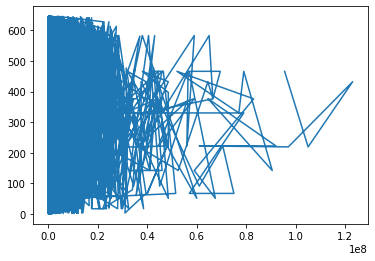

In [ ]:
plt.plot(data["Value"].values,data["Club"].values)
plt.show()

In [80]:
y=data["Overall"]
X=data.drop(["Overall","Value","Wage"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train),reg.score(X_test, y_test)

(0.8517969596177548, 0.8449657196359079)

In [86]:
poly = PolynomialFeatures(2)
poly_features=poly.fit_transform(X_train)
pol_reg = LinearRegression().fit(poly_features, y_train)
poly_features_test=poly.transform(X_test)
pol_reg.score(poly_features, y_train),pol_reg.score(poly_features_test, y_test)

(0.9751989538984935, 0.9687326600196008)